In [1]:
from fastai.vision.all import*

In [2]:
import pandas as pd

In [3]:
from fastai.vision.widgets import *

In [4]:
from ipywidgets import widgets

In [5]:
path=untar_data(URLs.PASCAL_2007)

In [6]:
path.ls()

(#8) [Path('/home/ozkanib20/.fastai/data/pascal_2007/segmentation'),Path('/home/ozkanib20/.fastai/data/pascal_2007/test.json'),Path('/home/ozkanib20/.fastai/data/pascal_2007/train.json'),Path('/home/ozkanib20/.fastai/data/pascal_2007/valid.json'),Path('/home/ozkanib20/.fastai/data/pascal_2007/test.csv'),Path('/home/ozkanib20/.fastai/data/pascal_2007/test'),Path('/home/ozkanib20/.fastai/data/pascal_2007/train.csv'),Path('/home/ozkanib20/.fastai/data/pascal_2007/train')]

In [7]:
df=pd.read_csv(path/'train.csv')

In [8]:
df.head()

,fname,labels,is_valid
0,000005.jpg,chair,True
1,000007.jpg,car,True
2,000009.jpg,horse person,True
3,000012.jpg,car,False
4,000016.jpg,bicycle,True


In [9]:
def get_x(df): return path/'train'/df['fname'] 
def get_y(df): return df['labels'].split()
def splitter(df): 
    valid_idx=df.index[df['is_valid']].tolist()
    train_idx=df.index[df['is_valid']].tolist()
    return train_idx,valid_idx

In [10]:
 dblock=DataBlock(blocks=(ImageBlock,MultiCategoryBlock),
                get_y=get_y,get_x=get_x,splitter=splitter,
                item_tfms=RandomResizedCrop(128,min_scale=0.35),
                 batch_tfms=aug_transforms())

In [11]:
dsets=dblock.datasets(df)

In [12]:
dsets.train.vocab

['aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor']

In [13]:
dsets.train.vocab[torch.where(dsets[2][1]==1.)[0]]

(#2) ['horse','person']

In [14]:
dls=dblock.dataloaders(df)

In [15]:
dls.vocab

['aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor']

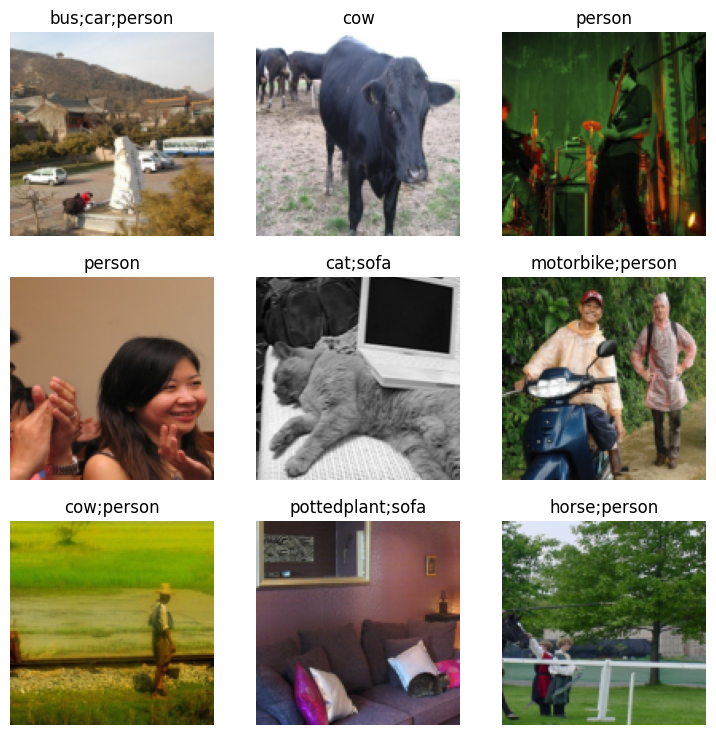

In [10]:
dls.show_batch()

In [10]:
learn=vision_learner(dls,resnet18)

/home/ozkanib20/miniconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/ozkanib20/miniconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [15]:
a,b=to_cpu(dls.train.one_batch())

In [16]:
activ=learn.model(a)
activ.shape

torch.Size([64, 20])

In [17]:
torch.where(b==1)

(TensorMultiCategory([ 0,  1,  1,  2,  2,  3,  3,  4,  5,  6,  7,  7,  8,  9, 10,
                      11, 11, 12, 13, 13, 14, 15, 15, 16, 16, 17, 17, 18, 18, 18,
                      19, 19, 19, 20, 20, 21, 22, 23, 24, 24, 25, 25, 26, 26, 27,
                      27, 28, 28, 29, 30, 31, 32, 33, 34, 35, 35, 35, 36, 37, 37,
                      38, 39, 40, 40, 41, 42, 42, 43, 44, 44, 45, 46, 46, 47, 47,
                      48, 49, 50, 50, 51, 52, 52, 53, 54, 54, 55, 55, 56, 57, 58,
                      59, 59, 60, 60, 61, 61, 62, 63]),
 TensorMultiCategory([19,  8, 14,  3, 14, 13, 14,  2,  2,  7,  3, 14,  6,  0,  0,
                       8, 17,  9, 12, 14, 18,  7, 17,  7, 14,  1,  8,  8, 14, 17,
                       1, 13, 14, 12, 14,  2, 14,  1,  3, 14,  1, 14, 11, 14,  8,
                      14,  1, 14,  6,  0, 11, 16,  2,  5,  8, 14, 19,  6,  5, 14,
                       6,  2,  8, 17,  7,  8, 19, 11, 14, 19,  3, 13, 14,  7, 15,
                       4, 11,  5,  6, 11, 

In [18]:
activ

TensorBase([[ 0.3234, -0.1235, -1.0317,  ...,  2.0994,  0.1923,  0.9178],
            [-0.3575, -0.9902,  0.6358,  ..., -1.4970, -0.7484,  0.1162],
            [-0.0571, -2.1256,  0.5190,  ..., -0.6559, -0.2473,  4.9363],
            ...,
            [-0.3927, -1.0567,  0.1590,  ..., -4.0383, -0.5542, -3.0031],
            [-0.3707,  0.9909,  2.2090,  ..., -0.9187, -1.4906, -1.0911],
            [-1.1717,  1.5505, -2.2975,  ..., -0.4845,  0.2304, -1.4611]],
           grad_fn=<AliasBackward0>)

SuggestedLRs(valley=0.0020892962347716093)

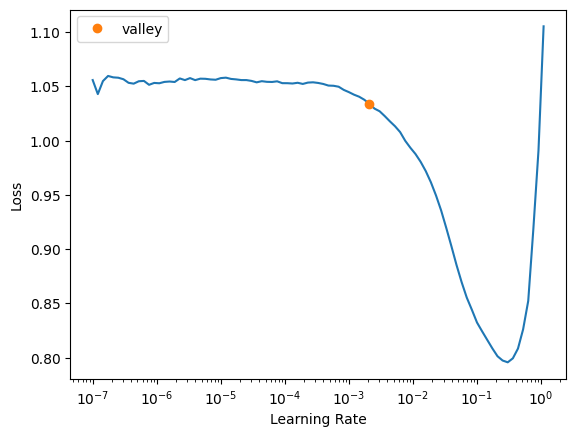

In [11]:
learn.lr_find()

In [12]:
learn.fine_tune(2,freeze_epochs=2,base_lr=2e-3)

epoch,train_loss,valid_loss,time
0,0.976914,0.729777,00:13
1,0.796057,0.429428,00:12


epoch,train_loss,valid_loss,time
0,0.471683,0.272767,00:14
1,0.372702,0.219217,00:14


In [13]:
def accuracy_multip(preds,targets,tresh=0.5,sigmoid=True): 
    if sigmoid: preds=preds.sigmoid()
    return ((preds>tresh)==targets.bool()).float().mean()

In [14]:
preds,targets=learn.get_preds()

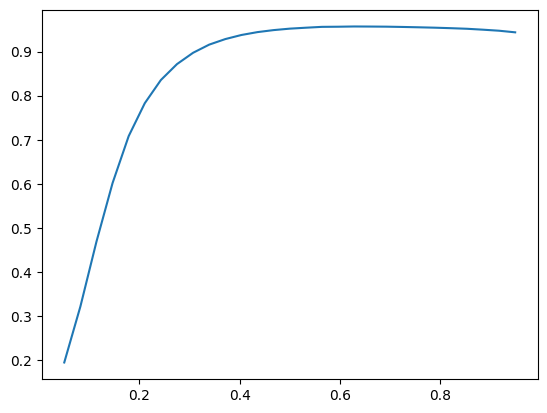

In [15]:
xaxis=torch.linspace(0.05,0.95,29)
accs=[accuracy_multip(preds,targets,tresh=i,sigmoid=False) for i in xaxis]
plt.plot(xaxis,accs)

In [16]:
learn=vision_learner(dls,resnet50,metrics=accuracy_multip)

/home/ozkanib20/miniconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [17]:
learn.fine_tune(3,freeze_epochs=3,base_lr=2e-3)

epoch,train_loss,valid_loss,accuracy_multip,time
0,0.959754,0.697460,0.629303,00:19
1,0.838175,0.549126,0.739084,00:19
2,0.621410,0.197553,0.956534,00:19


epoch,train_loss,valid_loss,accuracy_multip,time
0,0.255882,0.128603,0.966255,00:24
1,0.194463,0.096349,0.970299,00:24
2,0.162170,0.090580,0.971554,00:24


SuggestedLRs(valley=0.00019054606673307717)

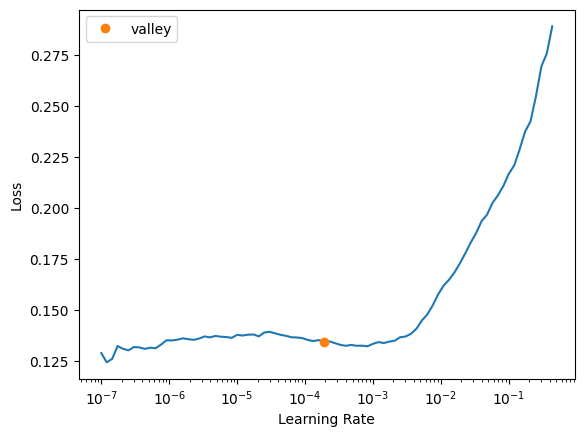

In [18]:
learn.lr_find()

In [19]:
learn.unfreeze()

In [20]:
learn.fit_one_cycle(2,lr_max=slice(3e-5,1e-3))

epoch,train_loss,valid_loss,accuracy_multip,time
0,0.134452,0.079068,0.973287,00:25
1,0.119784,0.069737,0.975359,00:24


SuggestedLRs(valley=0.00013182566908653826)

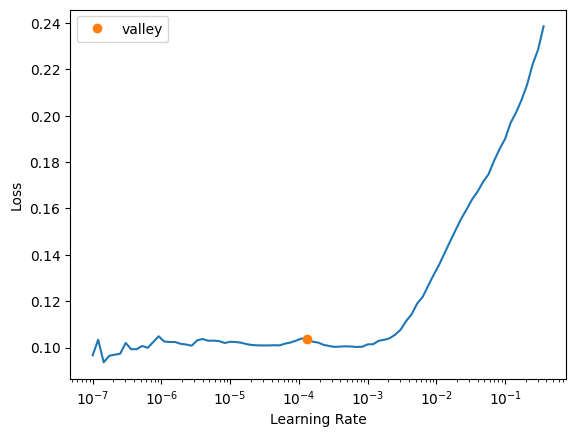

In [21]:
learn.lr_find()

In [22]:
learn.fit_one_cycle(2,lr_max=slice(1e-4,1e-3))

epoch,train_loss,valid_loss,accuracy_multip,time
0,0.109186,0.072748,0.973705,00:25
1,0.102086,0.060057,0.978327,00:24


In [23]:
interp=ClassificationInterpretation.from_learner(learn)

In [24]:
interp.most_confused()

[('bicycle', 'aeroplane', 874), ('aeroplane', 'bicycle', 214)]

,target,predicted,probabilities,loss
0,dog;pottedplant;sofa;tvmonitor,cat;dog,"TensorBase([3.3275e-04, 9.5848e-04, 8.1320e-04, 1.0790e-03, 2.7721e-03,\n 6.0434e-04, 1.2818e-03, 5.6178e-01, 8.9781e-02, 9.1219e-04,\n 5.9500e-03, 9.0505e-01, 3.1074e-03, 7.3960e-04, 1.3733e-02,\n 1.9422e-02, 1.9863e-03, 5.7964e-02, 1.6404e-03, 2.5119e-02])",0.5764166712760925
1,diningtable;pottedplant;sofa,chair;diningtable,"TensorBase([0.0018, 0.0017, 0.0011, 0.0039, 0.3537, 0.0026, 0.0318, 0.0044,\n 0.9811, 0.0012, 0.9848, 0.0064, 0.0020, 0.0018, 0.0605, 0.0748,\n 0.0020, 0.0889, 0.0088, 0.1263])",0.48506712913513184
2,dog;motorbike;person,person,"TensorBase([0.0103, 0.0121, 0.0172, 0.0182, 0.0142, 0.0063, 0.0244, 0.0036,\n 0.0120, 0.0205, 0.0045, 0.0060, 0.0518, 0.0216, 0.9592, 0.0043,\n 0.0114, 0.0056, 0.0054, 0.0033])",0.4609043300151825
3,dog;motorbike,horse,"TensorBase([0.0051, 0.0092, 0.0236, 0.0342, 0.0026, 0.0089, 0.0097, 0.0033,\n 0.0056, 0.3269, 0.0035, 0.1096, 0.6882, 0.0104, 0.3711, 0.0068,\n 0.0222, 0.0025, 0.0059, 0.0045])",0.4476223587989807
4,chair;dog;person;pottedplant;sofa;tvmonitor,person;sofa,"TensorBase([0.0045, 0.0063, 0.0024, 0.0035, 0.0272, 0.0052, 0.0491, 0.0091,\n 0.4443, 0.0110, 0.0218, 0.0473, 0.0065, 0.0041, 0.9791, 0.0732,\n 0.0072, 0.9437, 0.0080, 0.1514])",0.4306558668613434


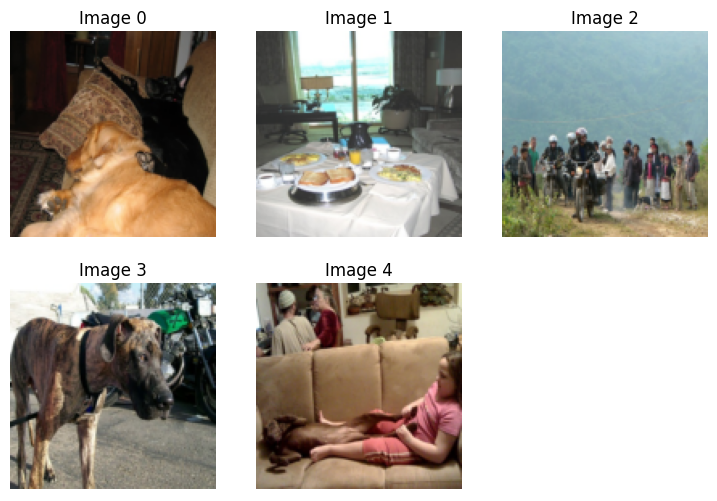

In [31]:
interp.plot_top_losses(5)

In [32]:
dls.vocab

['aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor']

In [34]:
 learn.export('MLCmodel.pkl')